In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
from tensorflow.keras.datasets import mnist

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

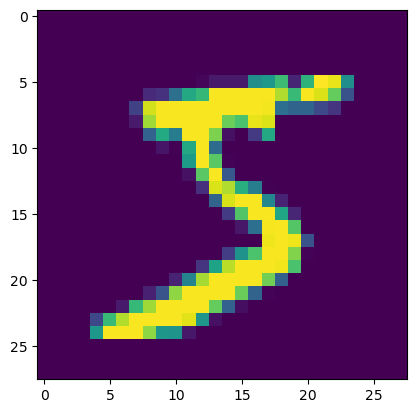

In [62]:
plt.imshow(X_train[0])

In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
only_zeros = X_train[y_train==0]

In [65]:
only_zeros.shape

(5923, 28, 28)

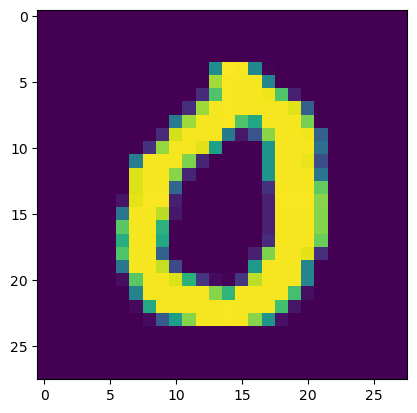

In [66]:
plt.imshow(only_zeros[1436])

In [67]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [68]:
discr=Sequential()

discr.add(Flatten(input_shape=[28,28]))

discr.add(Dense(150,activation='relu'))
discr.add(Dense(100,activation='relu'))
discr.add(Dense(1,activation='sigmoid'))

discr.compile(loss='binary_crossentropy',optimizer='adam')

In [69]:
coding_size=100

In [70]:
generator=Sequential()

generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))

generator.add(Reshape([28,28]))


In [71]:
GAN=Sequential([generator,discr])

In [72]:
discr.trainable=False

In [73]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [74]:
GAN.layers[0].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [75]:
GAN.layers[1].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [76]:
GAN.layers[0].layers

In [77]:
GAN.layers[1].layers

In [78]:
batch_size=32

In [79]:
my_data=only_zeros

In [80]:
dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [81]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [82]:
dataset=dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [93]:
epochs=10

In [94]:
generator , discr = GAN.layers
for epoch in range(epochs):
    print(f'Currently on epoch {epoch+1}')
    i=0
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print (f'\t Currently on batch number {i} of {len(my_data)//batch_size}')
        
        
        noise = tf.random.normal(shape = [batch_size,coding_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1=tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        discr.trainable=True
        discr.train_on_batch(X_fake_vs_real,y1)
        
        noise = tf.random.normal(shape = [batch_size,coding_size])
        y2=tf.constant([[1.0]]*batch_size)
        discr.trainable=False
        GAN.train_on_batch(noise,y2)
        
        

Currently on epoch 1
	 Currently on batch number 100 of 185
Currently on epoch 2
	 Currently on batch number 100 of 185
Currently on epoch 3
	 Currently on batch number 100 of 185
Currently on epoch 4
	 Currently on batch number 100 of 185
Currently on epoch 5
	 Currently on batch number 100 of 185
Currently on epoch 6
	 Currently on batch number 100 of 185
Currently on epoch 7
	 Currently on batch number 100 of 185
Currently on epoch 8
	 Currently on batch number 100 of 185
Currently on epoch 9
	 Currently on batch number 100 of 185
Currently on epoch 10
	 Currently on batch number 100 of 185


In [95]:
noise = tf.random.normal(shape=[10, coding_size])

In [96]:
noise.shape

TensorShape([10, 100])

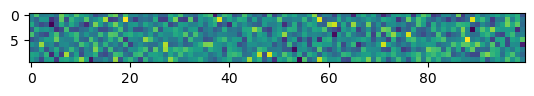

In [97]:
plt.imshow(noise)

In [98]:
image_pic=generator(noise)

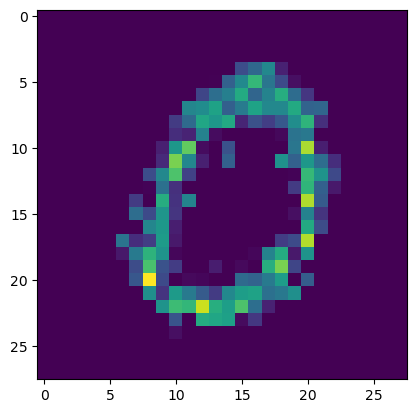

In [102]:
plt.imshow(image_pic[4])

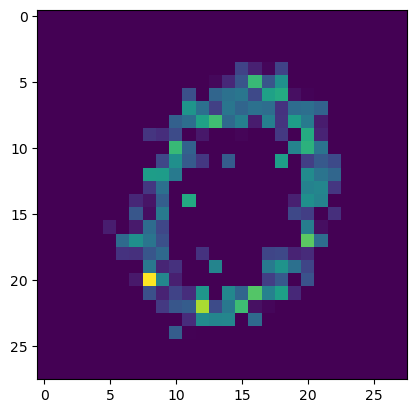

In [103]:
plt.imshow(image_pic[7])